<a href="https://colab.research.google.com/github/Andyfer004/P2-DS/blob/main/P2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala  
## Facultad de Ingeniería  
### Departamento de Ciencias de la Computación  


## Proyecto 2 – Análisis Exploratorio de Datos  
**Curso:** CC3084 – Data Science  
**Semestre:** II – 2025  

**Tema seleccionado (Reto 19):** Clasificación de los orígenes de un coágulo de sangre en un accidente cerebrovascular  

**Integrantes del grupo:**  
- Andy Fuentes – 22944  
- Gabriel Paz – 221087  
- Davis Roldán – 22672  
- Jose Marchena – Carné  

**Catedrático:** Prof. Luis Furlán  

**Fecha de entrega:** 14 de septiembre de 2025  


## Introducción

La Ciencia de Datos permite abordar problemas complejos en distintas áreas, incluyendo la medicina.  
En este proyecto se trabajará con datos del **Mayo Clinic STRIP AI Challenge**, cuyo objetivo es clasificar el origen de trombos en pacientes con accidente cerebrovascular isquémico.  

El análisis se centra en diferenciar dos tipos principales de etiología:  
- **Cardioembólico (CE)**: coágulos originados en el corazón.  
- **Ateroesclerosis de arteria grande (LAA)**: coágulos formados en arterias cerebrales principales.  

Un diagnóstico temprano y preciso del origen del coágulo es crucial, ya que permite diseñar **estrategias de prevención secundaria** y tratamientos más efectivos, reduciendo el riesgo de recurrencia del evento.  

Para alcanzar este objetivo, se llevará a cabo un **Análisis Exploratorio de Datos (EDA)** sobre imágenes histopatológicas (Whole Slide Images – WSI), identificando patrones, distribuciones y características relevantes que preparen la base para el modelado posterior.

## Situación problemática

El accidente cerebrovascular isquémico (ACV) es una de las principales causas de discapacidad y muerte a nivel mundial.  
Una parte importante de los ACV se origina en la **formación de coágulos (trombos)** que obstruyen el flujo sanguíneo al cerebro.  
Identificar el **origen del trombo** es crítico:  

- **Cardioembólico (CE):** originado en el corazón, suele requerir anticoagulación.  
- **Ateroesclerosis de arteria grande (LAA):** formado en arterias principales, sugiere tratamiento antiagregante y control de factores de riesgo.  

El reto radica en que, aun después de estudios clínicos e imagenológicos, el **origen del trombo muchas veces queda indeterminado**, lo que dificulta aplicar la estrategia de prevención más adecuada.


## Problema científico

¿Es posible identificar **patrones histológicos cuantificables** en imágenes completas de trombos (Whole Slide Images) que permitan a un modelo de Ciencia de Datos **clasificar de forma confiable** su origen en **CE o LAA**?


## Objetivos

**Objetivo general**  
Desarrollar un análisis exploratorio de datos (EDA) sobre las imágenes histopatológicas de trombos, con el fin de identificar patrones y características relevantes que preparen la base para un modelo de clasificación CE vs LAA.

**Objetivos específicos**  
1. Describir la estructura del dataset, incluyendo número de casos, distribución por clase y metadatos asociados.  
2. Implementar técnicas de preprocesamiento para filtrar tiles no informativos (fondo, blur, bajo tejido) y normalizar la tinción.  
3. Explorar métricas básicas de color, textura y cobertura de tejido para cada clase.  
4. Visualizar los datos mediante histogramas, boxplots y reducciones de dimensionalidad (UMAP/t-SNE) para detectar posibles separaciones entre clases.

## Investigación preliminar

### Contexto médico
El **accidente cerebrovascular isquémico (ACV)** ocurre cuando un coágulo interrumpe el flujo sanguíneo al cerebro.  
Existen varias causas, pero dos de las más frecuentes son:  

- **Cardioembólico (CE):** coágulos que se originan en el corazón, por ejemplo a raíz de fibrilación auricular o insuficiencia cardíaca.  
- **Ateroesclerosis de arteria grande (LAA):** trombos formados en arterias cerebrales principales debido a placas ateroscleróticas.  

La distinción entre ambos es esencial, ya que determina el tratamiento: anticoagulación para CE vs. antiagregación y control de factores de riesgo para LAA.  

### Imágenes histopatológicas
En el reto se utilizan **Whole Slide Images (WSI)** de trombos extraídos mediante trombectomía.  
Estas imágenes se obtienen con tinción **Hematoxilina & Eosina (H&E)**, que resalta estructuras celulares:  
- Hematoxilina → tiñe núcleos de color azul/púrpura.  
- Eosina → tiñe citoplasma y componentes extracelulares de rosado.  

### Relevancia del análisis computacional
El análisis manual de WSI es complejo y requiere mucho tiempo de especialistas.  
Aquí entra la **Ciencia de Datos**, que permite:  
- Fragmentar imágenes en **tiles** para su estudio.  
- Aplicar técnicas de **preprocesamiento** como normalización de color y eliminación de ruido.  
- Extraer **características cuantitativas** (textura, color, cobertura de tejido).  
- Generar representaciones que faciliten la clasificación con modelos de Visión por Computadora.

### Estado del arte en Visión Artificial para WSI
- Se emplean **CNNs** preentrenadas (ResNet, EfficientNet) para extraer embeddings.  
- Se utilizan técnicas de **Multiple Instance Learning (MIL)** donde cada WSI se representa como conjunto de tiles.  
- Métodos recientes incluyen **transformers** y mecanismos de **atención**, que aprenden qué regiones de la WSI son más informativas para predecir el origen del trombo.  

En este proyecto, no se busca aún entrenar un modelo complejo, sino realizar un **análisis exploratorio** que evidencie patrones básicos y prepare los datos para etapas posteriores.

## Descripción de los datos

El reto **Mayo Clinic – STRIP AI** proporciona un conjunto de datos compuesto por imágenes histopatológicas completas (**Whole Slide Images, WSI**) y archivos de etiquetas en formato CSV.

- **Entrenamiento (train/):** contiene las imágenes WSI de trombos extraídos, en formato `.tiff` o `.svs`.
- **Prueba (test/):** incluye WSI sin etiquetas, usadas únicamente para predicciones.
- **train.csv:** archivo que enlaza cada WSI con su clase (Cardioembólico – CE o Ateroesclerosis de arteria grande – LAA).
- **sample_submission.csv:** plantilla para generar predicciones en Kaggle.
- (Opcional) Archivos adicionales con metadatos, que pueden incluir información de paciente, centro de origen o escáner utilizado.

Para este análisis exploratorio, se trabajará únicamente con las imágenes del set de **entrenamiento** y el archivo `train.csv`.  
Los objetivos principales en esta sección son:
1. Verificar la descarga y estructura de los archivos.  
2. Identificar el número total de pacientes y WSI.  
3. Revisar el balance de clases (CE vs LAA).  

## Análisis inicial del archivo `train.csv`

En esta sección se exploran las etiquetas del conjunto de entrenamiento, verificando la cantidad de observaciones, las variables disponibles y la distribución de clases (CE vs LAA).  

1. **Carga del dataset:** se importa el archivo `train.csv` en un DataFrame de pandas.  
2. **Exploración inicial:** se muestran las primeras filas, la estructura general y el resumen estadístico.  
3. **Valores faltantes:** se identifican posibles datos nulos en las columnas.  
4. **Distribución de clases:** se realiza un conteo y visualización gráfica de las clases Cardioembólico (CE) y Ateroesclerosis de arteria grande (LAA).  

Primeras filas del dataset:


,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    754 non-null    object
 1   center_id   754 non-null    int64 
 2   patient_id  754 non-null    object
 3   image_num   754 non-null    int64 
 4   label       754 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.6+ KB
None

Resumen estadístico:


,image_id,center_id,patient_id,image_num,label
count,754,754.000000,754,754.000000,754
unique,754,NaN,632,NaN,2
top,006388_0,NaN,91b9d3,NaN,CE
freq,1,NaN,5,NaN,547
mean,NaN,7.115385,NaN,0.226790,NaN
std,NaN,3.504306,NaN,0.599046,NaN
min,NaN,1.000000,NaN,0.000000,NaN
25%,NaN,4.000000,NaN,0.000000,NaN
50%,NaN,7.000000,NaN,0.000000,NaN
75%,NaN,11.000000,NaN,0.000000,NaN



Valores nulos por columna:
image_id      0
center_id     0
patient_id    0
image_num     0
label         0
dtype: int64

Distribución de clases:
label
CE     547
LAA    207
Name: count, dtype: int64


/var/folders/qk/ksymdt5x5j97hrfd6ssbxck80000gn/T/ipykernel_4223/1176481268.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='label', palette="Set2")


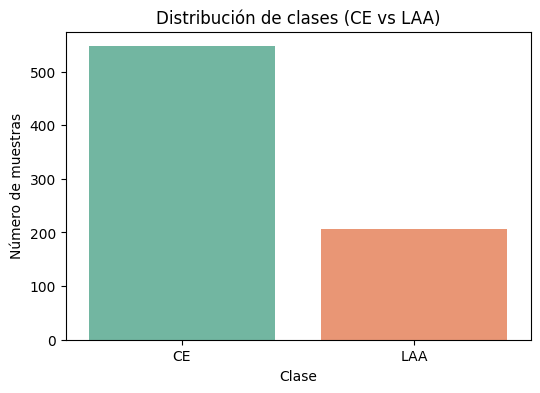

In [2]:
# ==========================================
# Exploración inicial de train.csv
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el archivo CSV
train = pd.read_csv("data/train.csv")

# 2. Mostrar las primeras filas
print("Primeras filas del dataset:")
display(train.head())

# 3. Información general del dataset
print("\nInformación general:")
print(train.info())

# 4. Resumen estadístico
print("\nResumen estadístico:")
display(train.describe(include="all"))

# 5. Conteo de valores nulos
print("\nValores nulos por columna:")
print(train.isnull().sum())

# 6. Distribución de clases
print("\nDistribución de clases:")
print(train['label'].value_counts())

# 7. Visualización de la distribución de clases
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='label', palette="Set2")
plt.title("Distribución de clases (CE vs LAA)")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.show()